In [1]:
from pybaseball import statcast
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names")

In [3]:
ID = pd.read_excel("SFBB-Player-ID-Map.xlsx")
ID.dropna(subset=['MLBID'], inplace=True)
ID['MLBID'] = ID['MLBID'].astype(int)

ID

,IDPLAYER,PLAYERNAME,BIRTHDATE,FIRSTNAME,LASTNAME,TEAM,LG,POS,IDFANGRAPHS,FANGRAPHSNAME,...,DRAFTKINGSNAME,OTTONEUID,HQID,RAZZBALLNAME,FANTRAXID,FANTRAXNAME,ROTOWIRENAME,ALLPOS,NFBCLASTFIRST,ACTIVE
0,aardsda01,David Aardsma,1981-12-27,David,Aardsma,NaN,NaN,P,1902,David Aardsma,...,David Aardsma,4362.0,NaN,David Aardsma,NaN,David Aardsma,David Aardsma,P,"Aardsma, David",N
1,abadfe01,Fernando Abad,1985-12-17,Fernando,Abad,NaN,NaN,P,4994,Fernando Abad,...,Fernando Abad,7372.0,3556.0,Fernando Abad,*01viz*,Fernando Abad,Fernando Abad,RP,"Abad, Fernando",Y
2,abbotco01,Cory Abbott,1995-09-20,Cory,Abbott,CHC,NL,P,sa3005305,Cory Abbott,...,NaN,27184.0,6286.0,Cory Abbott,*04ef6*,Cory Abbott,Cory Abbott,RP,"Abbott, Cory",Y
3,abramcj01,CJ Abrams,2000-10-03,CJ,Abrams,SD,NL,SS,sa3010152,CJ Abrams,...,NaN,36922.0,6791.0,CJ Abrams,*04qk8*,CJ Abrams,CJ Abrams,SS,"Abrams, CJ",Y
4,abreual01,Albert Abreu,1995-09-26,Albert,Abreu,NYY,AL,P,17485,Albert Abreu,...,NaN,20720.0,5762.0,Albert Abreu,*03xy4*,Albert Abreu,Albert Abreu,RP,"Abreu, Albert",Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2744,zitoba01,Barry Zito,1978-05-13,Barry,Zito,NaN,NaN,P,944,Barry Zito,...,NaN,15206.0,NaN,Barry Zito,NaN,Barry Zito,Barry Zito,P,"Zito, Barry",N
2745,zobribe01,Ben Zobrist,1981-05-26,Ben,Zobrist,CHC,NL,2B,7435,Ben Zobrist,...,Ben Zobrist,4083.0,2380.0,Ben Zobrist,*000bt*,Ben Zobrist,Ben Zobrist,2B,"Zobrist, Ben",N
2746,zuberty01,Tyler Zuber,1995-06-16,Tyler,Zuber,KC,AL,P,20379,Tyler Zuber,...,NaN,31925.0,6495.0,Tyler Zuber,*04ehi*,Tyler Zuber,Tyler Zuber,RP,"Zuber, Tyler",Y
2747,zuninmi01,Mike Zunino,1991-03-25,Mike,Zunino,TB,AL,C,13265,Mike Zunino,...,Mike Zunino,18183.0,4221.0,Mike Zunino,*02i12*,Mike Zunino,Mike Zunino,C,"Zunino, Mike",Y


In [4]:
#expected = pd.read_csv("Expected.csv")
#expected = pd.merge(expected, ID[["MLBID", "MLBNAME"]], left_on = 'batter', right_on = 'MLBID', how='left')
#expected

In [5]:
savant2023 = statcast(start_dt = "2023-03-30", end_dt = "2023-10-02")
savant2023 = pd.merge(savant2023, ID[["MLBID", "MLBNAME"]], left_on = 'batter', right_on = 'MLBID', how = 'left')

This is a large query, it may take a moment to complete


100%|██████████| 187/187 [01:31<00:00,  2.03it/s]


In [52]:
pd.set_option('display.max_columns', None)

savant2023.dropna(subset=['MLBNAME'], inplace=True)
savant2023 = savant2023.drop_duplicates(subset = ["pitch_type", "game_date", "release_speed", "release_pos_x", "release_pos_z", "player_name"], keep='first')

savant2023

/var/folders/bs/6lp27nzn3wvg1ygrkwrcl96w0000gn/T/ipykernel_49940/3998747038.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  savant2023.dropna(subset=['MLBNAME'], inplace=True)


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,MLBID,MLBNAME
6,CH,2023-10-01,88.2,-2.86,5.51,"Robertson, Nick",602104,687798,strikeout,swinging_strike,<NA>,<NA>,<NA>,<NA>,13,Ramon Urias strikes out swinging.,R,R,R,BAL,BOS,S,2,None,2,2,2023,-1.45,0.43,-0.82,1.19,<NA>,<NA>,<NA>,1,9,Bot,<NA>,<NA>,<NA>,<NA>,657136,<NA>,<NA>,8.123411,-128.123445,-5.373029,-17.605529,26.545899,-26.498222,3.12,1.46,<NA>,<NA>,<NA>,89.6,1656,7.2,716367,687798,657136,666915,665839,622569,596115,677800,678882,608701,53.26,<NA>,<NA>,0.0,1,0,0,<NA>,72,6,Changeup,1,6,1,6,6,1,1,6,Standard,Standard,254,-0.002,-0.148,602104.0,Ramon Urias
7,FF,2023-10-01,95.7,-2.4,5.8,"Robertson, Nick",602104,687798,None,foul,<NA>,<NA>,<NA>,<NA>,6,Ramon Urias strikes out swinging.,R,R,R,BAL,BOS,S,<NA>,None,2,2,2023,-0.48,1.3,0.5,2.09,<NA>,<NA>,<NA>,1,9,Bot,<NA>,<NA>,<NA>,<NA>,657136,<NA>,<NA>,8.91699,-138.968451,-7.23025,-8.153688,30.274685,-13.803886,3.12,1.46,299,87.9,30,97.5,2097,7.4,716367,687798,657136,666915,665839,622569,596115,677800,678882,608701,53.12,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,72,5,4-Seam Fastball,1,6,1,6,6,1,1,6,Standard,Standard,210,0.0,0.0,602104.0,Ramon Urias
8,SL,2023-10-01,79.4,-2.96,5.67,"Robertson, Nick",602104,687798,None,ball,<NA>,<NA>,<NA>,<NA>,11,Ramon Urias strikes out swinging.,R,R,R,BAL,BOS,B,<NA>,None,1,2,2023,1.66,-0.2,-1.84,4.08,<NA>,<NA>,<NA>,1,9,Bot,<NA>,<NA>,<NA>,<NA>,657136,<NA>,<NA>,-0.672901,-115.511662,3.704152,15.019966,21.584765,-34.899383,3.07,1.51,<NA>,<NA>,<NA>,79.9,2744,6.6,716367,687798,657136,666915,665839,622569,596115,677800,678882,608701,53.85,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,72,4,Slider,1,6,1,6,6,1,1,6,Standard,Standard,60,0.0,0.029,602104.0,Ramon Urias
9,SL,2023-10-01,82.9,-2.82,5.66,"Robertson, Nick",602104,687798,None,ball,<NA>,<NA>,<NA>,<NA>,14,Ramon Urias strikes out swinging.,R,R,R,BAL,BOS,B,<NA>,None,0,2,2023,1.16,0.01,1.13,0.97,<NA>,<NA>,<NA>,1,9,Bot,<NA>,<NA>,<NA>,<NA>,657136,<NA>,<NA>,6.837709,-120.679821,-4.33055,10.10397,22.062598,-31.4879,3.1,1.46,<NA>,<NA>,<NA>,84.1,2754,6.9,716367,687798,657136,666915,665839,622569,596115,677800,678882,608701,53.57,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,72,3,Slider,1,6,1,6,6,1,1,6,Standard,Standard,62,0.0,0.012,602104.0,Ramon Urias
10,SL,2023-10-01,82.0,-3.0,5.69,"Robertson, Nick",602104,687798,None,called_strike,<NA>,<NA>,<NA>,<NA>,4,Ramon Urias strikes out swinging.,R,R,R,BAL,BOS,S,<NA>,None,0,1,2023,1.45,0.06,-0.65,2.34,<NA>,<NA>,<NA>,1,9,Bot,<NA>,<NA>,<NA>,<NA>,657136,<NA>,<NA>,2.512905,-119.426935,-1.117788,13.372972,23.916332,-31.571593,3.07,1.48,<NA>,<NA>,<NA>,82.4,2798,6.6,716367,687798,657136,666915,665839,622569,596115,677800,678882,608701,53.93,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,72,2,Slider,1,6,1,6,6,1,1,6,Standard,Standard,63,0.0,-0.036,602104.0,Ramon Urias
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [53]:
cleaned = savant2023[["MLBNAME", "bb_type", "events", "description", "hit_distance_sc", "launch_speed", "launch_angle", "estimated_ba_using_speedangle", "estimated_woba_using_speedangle", "woba_value", "delta_run_exp"]]
cleaned

,MLBNAME,bb_type,events,description,hit_distance_sc,launch_speed,launch_angle,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,delta_home_win_exp,delta_run_exp
6,Ramon Urias,None,strikeout,swinging_strike,<NA>,<NA>,<NA>,<NA>,<NA>,0.0,-0.002,-0.148
7,Ramon Urias,None,None,foul,299,87.9,30,<NA>,<NA>,<NA>,0.0,0.0
8,Ramon Urias,None,None,ball,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0.0,0.029
9,Ramon Urias,None,None,ball,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0.0,0.012
10,Ramon Urias,None,None,called_strike,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0.0,-0.036
...,...,...,...,...,...,...,...,...,...,...,...,...
720261,Steven Kwan,None,None,called_strike,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0.0,-0.079
720262,Steven Kwan,None,None,called_strike,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0.0,-0.078
720263,Steven Kwan,None,None,ball,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0.0,0.135
720264,Steven Kwan,None,None,ball,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0.0,0.064


In [54]:
cleaned['Sweetspot'] = np.where((savant2023['launch_angle'].notna()) &
                                   (savant2023['launch_angle'] >= 8) & (savant2023['launch_angle'] <= 32), 1, 0)

cleaned["HardHit"] = np.where((savant2023['launch_speed'].notna()) &
                              (savant2023['launch_speed'] >= 95), 1, 0)

cleaned['Weak'] = np.where((savant2023['launch_speed'].notna()) &
                              (savant2023['launch_speed'] <= 59), 1, 0)

cleaned['Topped'] = np.where((pd.notna(savant2023['launch_angle']) & pd.notna(savant2023['launch_speed'])) &
                                 (((savant2023['launch_angle'] + savant2023['launch_speed']) * 2) <= 116), 1, 0)

cleaned['Under'] = np.where((pd.notna(savant2023['launch_angle']) & pd.notna(savant2023['launch_speed'])) &
                                (((savant2023['launch_angle'] + savant2023['launch_speed']) * 2) >= 116), 1, 0)

cleaned['Flare'] = np.where((pd.notna(savant2023['launch_angle']) & pd.notna(savant2023['launch_speed'])) &
                                ((((savant2023['launch_angle'] + savant2023['launch_speed']) * 1.3) <= 112) &
                                 (((savant2023['launch_angle'] + savant2023['launch_speed']) * 1.55) >= 92) &
                                 (savant2023['launch_speed'] >= 72) & (savant2023['launch_speed'] <= 86)) |

                                ((pd.notna(savant2023['launch_angle']) & pd.notna(savant2023['launch_speed'])) &
                                 (((savant2023['launch_speed'] * 2) - savant2023['launch_angle']) >= 87) &
                                 (savant2023['launch_angle'] <= 41) &
                                 (((savant2023['launch_speed'] * 2) + savant2023['launch_angle']) <= 175) &
                                 (((savant2023['launch_angle'] + savant2023['launch_speed']) * 1.3) >= 89) &
                                 (savant2023['launch_speed'] >= 59) & (savant2023['launch_speed'] <= 72)) |

                                ((pd.notna(savant2023['launch_angle']) & pd.notna(savant2023['launch_speed'])) &
                                 (savant2023['launch_angle'] <= 20) &
                                 (((savant2023['launch_angle'] + savant2023['launch_speed']) * 2.4) >= 98) &
                                 (savant2023['launch_speed'] >= 86) & (savant2023['launch_speed'] <= 95)) |

                                ((pd.notna(savant2023['launch_angle']) & pd.notna(savant2023['launch_speed'])) &
                                 ((savant2023['launch_speed'] - savant2023['launch_angle']) >= 76) &
                                 (((savant2023['launch_angle'] + savant2023['launch_speed']) * 2.4) >= 98) &
                                 (savant2023['launch_speed'] >= 95) & (savant2023['launch_angle'] <= 30)), 1, 0)

cleaned["Solid"] = np.where((pd.notna(savant2023['launch_angle']) & pd.notna(savant2023['launch_speed'])) &
                                (((savant2023['launch_speed'] * 1.5) - savant2023['launch_angle']) >= 111) &
                                 ((savant2023['launch_angle'] + savant2023['launch_speed']) >= 119) &
                                 (savant2023['launch_speed'] >= 95) &
                                 (savant2023['launch_angle'] >= 0) & (savant2023['launch_angle'] <= 52), 1, 0)

cleaned["Barrel"] = np.where((pd.notna(savant2023['launch_angle']) & pd.notna(savant2023['launch_speed'])) &
                                (((savant2023['launch_speed'] * 1.5) - savant2023['launch_angle']) >= 117) &
                                 ((savant2023['launch_angle'] + savant2023['launch_speed']) >= 124) &
                                 (savant2023['launch_speed'] >= 98) &
                                 (savant2023['launch_angle'] >= 4) & (savant2023['launch_angle'] <= 50), 1, 0)

/var/folders/bs/6lp27nzn3wvg1ygrkwrcl96w0000gn/T/ipykernel_49940/1793391286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned['Sweetspot'] = np.where((savant2023['launch_angle'].notna()) &
/var/folders/bs/6lp27nzn3wvg1ygrkwrcl96w0000gn/T/ipykernel_49940/1793391286.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned["HardHit"] = np.where((savant2023['launch_speed'].notna()) &
/var/folders/bs/6lp27nzn3wvg1ygrkwrcl96w0000gn/T/ipykernel_49940/1793391286.py:7: SettingWithCopyWarning: 
A value i

In [55]:
cleaned["description"].unique()

array(['swinging_strike', 'foul', 'ball', 'called_strike', 'foul_tip',
       'hit_into_play', 'blocked_ball', 'swinging_strike_blocked',
       'hit_by_pitch', 'foul_bunt', 'missed_bunt', 'pitchout',
       'unknown_strike', 'bunt_foul_tip'], dtype=object)

In [120]:
Simple = cleaned.groupby("MLBNAME").agg(
    BB = ('events', lambda x: (x == 'walk').sum()),
    #HBP = ('events', lambda x: (x == 'hit_by_pitch').sum()),
    K = ('events', lambda x: (x == 'strikeout').sum()),
    AB = ('events', lambda x: (x.isin(['other_out', 'single', 'double', 'triple', 'home_run', 'walk', 'strikeout', 'field_out', 'hit_by_pitch', 'sac_fly', 'sac_fly_double_play', 'sac_bunt', 'field_error', 'fielders_choice', 'double_play', 'fielders_choice_out', 'sac_fly_double_play', 'strikeout_double_play', 'catcher_interf', 'triple_play', 'grounded_into_double_play'])).sum()),
    BIP = ('description', lambda x: (x == "hit_into_play").sum()),
    EV = ('launch_speed', 'mean'),
    xBA = ('estimated_ba_using_speedangle', 'mean'),
    xwOBA = ('estimated_woba_using_speedangle', 'mean'),
    wOBA = ('woba_value', 'mean'),
    RunValue = ('delta_run_exp', 'sum'),
    SweetSpots = ("Sweetspot", "sum"),
    HardHit = ("HardHit", "sum"),
    Barrels = ("Barrel", "sum"))

Simple['EV'] = round(Simple['EV'], 1)
Simple['xwOBA'] = round(Simple['xwOBA'], 3)
Simple['wOBA'] = round(Simple['wOBA'], 3)
Simple['xBA'] = round(Simple['xBA'], 3)
Simple['K%'] = round((Simple['K'] / Simple['AB']) * 100, 2)
Simple['BB%'] = round((Simple['BB'] / Simple['AB']) * 100, 2)
Simple['SweetSpot%'] = round((Simple['SweetSpots'] / Simple['BIP']) * 100, 2)
Simple['HardHit%'] = round((Simple['HardHit'] / Simple['BIP']) * 100, 2)
Simple['Barrel%'] = round((Simple['Barrels'] / Simple['BIP']) * 100, 2)

Simple = Simple[Simple['AB'] >= 50]

Simple.sort_values(by = 'BIP', ascending = False)

,BB,K,AB,BIP,EV,xBA,xwOBA,wOBA,RunValue,SweetSpots,HardHit,Barrels,K%,BB%,SweetSpot%,HardHit%,Barrel%
MLBNAME,,,,,,,,,,,,,,,,,
Steven Kwan,68,74,701,570,80.3,0.314,0.309,0.321,0.075,352,122,6,10.56,9.70,61.75,21.40,1.05
Marcus Semien,71,109,743,565,83.0,0.305,0.343,0.371,33.051,309,251,43,14.67,9.56,54.69,44.42,7.61
Ronald Acuna,77,84,714,561,86.4,0.4,0.482,0.442,66.723,291,336,85,11.76,10.78,51.87,59.89,15.15
Jose Ramirez,51,71,654,543,84.8,0.335,0.372,0.357,6.79,329,296,50,10.86,7.80,60.59,54.51,9.21
Luis Arraez,25,34,596,543,82.9,0.351,0.361,0.377,31.776,393,152,16,5.70,4.19,72.38,27.99,2.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Jorge Alfaro,2,15,51,33,82.6,0.29,0.328,0.223,-3.858,19,16,3,29.41,3.92,57.58,48.48,9.09
Kyle Lewis,3,21,54,30,82.6,0.307,0.325,0.206,-4.763,19,12,3,38.89,5.56,63.33,40.00,10.00
Brett Phillips,8,36,71,27,77.5,0.341,0.408,0.27,-2.398,17,9,2,50.70,11.27,62.96,33.33,7.41


In [126]:
Percentiles = (Simple.rank(pct = True) * 100).round()
Percentiles = Percentiles[["xBA", "xwOBA", "wOBA", "RunValue", "SweetSpot%", "Barrel%", "K%", "BB%"]].reset_index()
Percentiles

#Percentiles.to_csv('~/Desktop/Random-Projects/MLB/MLBPercentiles2023.csv', index=False)

,MLBNAME,xBA,xwOBA,wOBA,RunValue,SweetSpot%,Barrel%,K%,BB%
0,A.J. Pollock,3.0,16.0,5.0,19.0,7.0,31.0,44.0,30.0
1,Aaron Hicks,7.0,7.0,58.0,78.0,12.0,16.0,40.0,92.0
2,Aaron Judge,100.0,100.0,99.0,98.0,59.0,100.0,80.0,100.0
3,Adam Duvall,42.0,74.0,80.0,72.0,50.0,91.0,88.0,26.0
4,Adam Frazier,35.0,19.0,43.0,58.0,87.0,18.0,11.0,39.0
...,...,...,...,...,...,...,...,...,...
386,Yordan Alvarez,97.0,99.0,99.0,99.0,53.0,98.0,25.0,92.0
387,Yu Chang,29.0,40.0,8.0,49.0,9.0,28.0,84.0,2.0
388,Yulieski Gurriel,9.0,4.0,29.0,7.0,5.0,5.0,6.0,42.0
389,Zach McKinstry,46.0,46.0,30.0,4.0,83.0,44.0,39.0,59.0


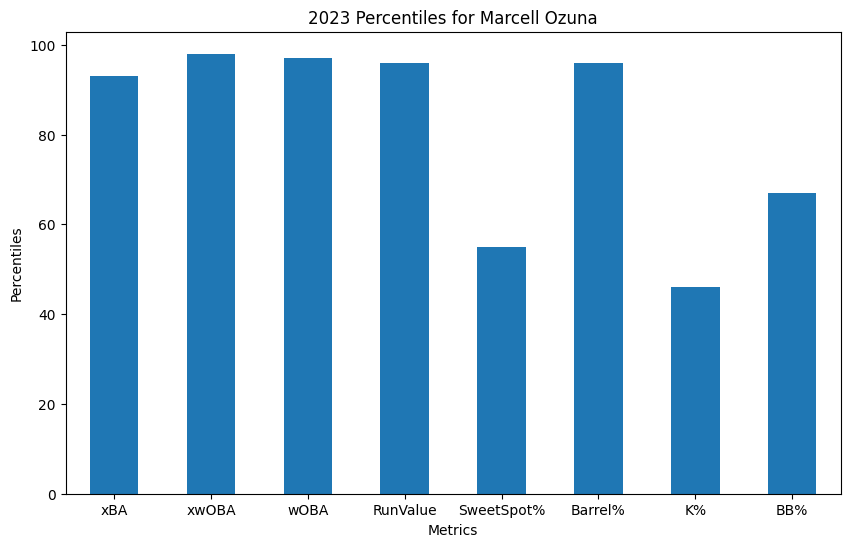

In [129]:
PlayerCard = Percentiles[Percentiles["MLBNAME"] == "Marcell Ozuna"].transpose()
PlayerCard.columns = PlayerCard.iloc[0]
PlayerCard = PlayerCard[1:]

PlayerCard.plot(kind='bar', legend=False, figsize=(10, 6), rot = 0)

# Set plot labels and title
plt.xlabel('Metrics')
plt.ylabel('Percentiles')
plt.title('2023 Percentiles for Marcell Ozuna')

# Show the plot
plt.show()